In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('C:/Users/Administrator/Desktop/Machine Learning/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data1=data[['age','bmi','children','charges']]

In [5]:
import matplotlib.pyplot as plt

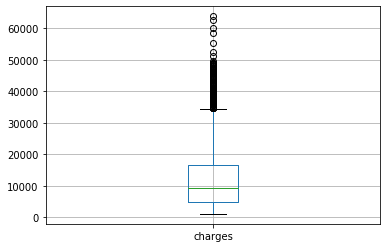

In [6]:
data.boxplot('charges')

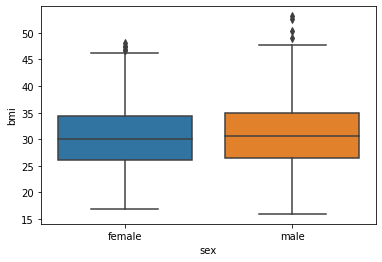

In [7]:
import seaborn as sns
sns.boxplot(data['sex'],data['bmi'])

In [8]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
r_data=sc.fit_transform(data1)
r_data=pd.DataFrame(r_data)
r_data.columns=data1.columns
r_data.head()

,age,bmi,children,charges
0,-0.833333,-0.297708,-0.5,0.630515
1,-0.875000,0.401310,0.0,-0.643422
2,-0.458333,0.309616,1.0,-0.414515
3,-0.250000,-0.916344,-0.5,1.059062
4,-0.291667,-0.181006,-0.5,-0.463475


In [9]:
r_data['age']=data['age']
r_data['sex']=data['sex']
r_data['region']=data['region']
r_data['smoker']=data['smoker']

In [10]:
r1_data=pd.get_dummies(r_data,drop_first=True)
r1_data.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,-0.297708,-0.5,0.630515,0,0,0,1,1
1,18,0.401310,0.0,-0.643422,1,0,1,0,0
2,28,0.309616,1.0,-0.414515,1,0,1,0,0
3,33,-0.916344,-0.5,1.059062,1,1,0,0,0
4,32,-0.181006,-0.5,-0.463475,1,1,0,0,0


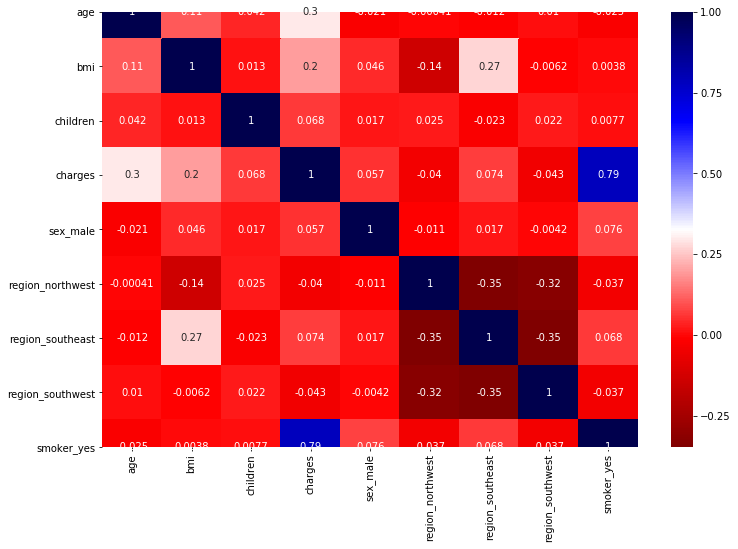

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(r1_data.corr(),cmap='seismic_r',annot=True)

In [12]:
x=r1_data.drop('charges',axis=1)
y=r1_data['charges']

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
reg=LinearRegression()
reg=reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.7999876970680434


In [16]:
from sklearn.linear_model import Ridge,Lasso

In [17]:
ridgereg=Ridge(alpha=.001,normalize=True)
ridgereg.fit(x_train,y_train)
pred=ridgereg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

print('RMSE=',rmse,'R2=',r2)

RMSE= 0.4741908267096533 R2= 0.7999120595224728


In [18]:
lassoreg=Lasso(alpha=.001,normalize=True)
lassoreg.fit(x_train,y_train)
pred=lassoreg.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

print('RMSE=',rmse,'R2=',r2)

RMSE= 0.48617179492234464 R2= 0.7896734311005814


In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
print('RMSE=',rmse,'R2=',r2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RMSE= 0.3667780473969945 R2= 0.8802925207161307


In [20]:
x_new=r1_data[['smoker_yes','bmi','age']]
y_new=r1_data['charges']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=0)

In [22]:
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
print('RMSE=',rmse,'R2=',r2)

RMSE= 0.4026924986959647 R2= 0.8557015397467149
